# Tutorial 2: Principal Component Analysis

Adapted from http://www.shogun-toolbox.org/static/notebook/current/pca_notebook.html

## Introduction
Principal Component Analysis (PCA) is a procedure to remove the redundancy present in the dataset by projecting it to a different low dimensional vector space while achieving the maximum variance. In other word, we represent the high dimensional data-point $x$ as linear combination of basis vectors or principal components as below:

$$
y = Fx + const
$$

where, $F \in \mathbb{R}^{M \times D}$ with $M < D$. Here $M = dim(y)$ and $D = dim(x)$.

![PCA Introduction](./images/pca1.png)

## PCA on 2D data

**Step 1: Get data**

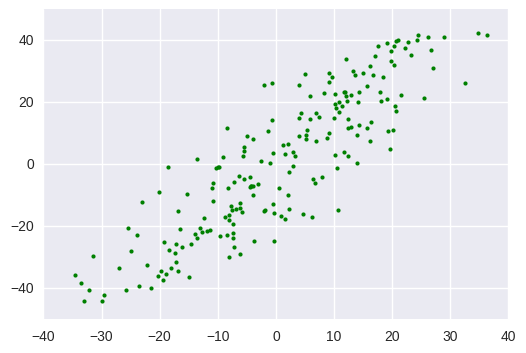

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

n = 200

# generate data along random line (y = mx + c)
m = np.random.randint(1, 10)
c = np.random.randint(1, 10)
x1 = np.random.randint(-20, 20, size=(n))

y1 = m*x1 + c

# add random noise
noise = np.random.rand(n) * np.random.randint(-35,35,size=n)

#make the noise orthogonal to the line y=mx+c and add it.
x=x1 + noise*m/np.sqrt(1+m**2)
y=y1 + noise/np.sqrt(1+m**2)

# vizualize
plt.plot(x, y, 'o', color='green', markersize=3)

**Step 2: Subtract the mean** 

In [5]:
X = np.array(zip(x, y))
X_sub = X - np.mean(X, axis=0)
np.mean(X, axis=0)

array([ 0.83535572,  0.99767786])

**Step 3: Find covariance matrix**

In [14]:
# covariance matrix
cov_mat = np.cov(X_sub.T)
cov_mat

array([[ 231.83804752,  307.35286216],
       [ 307.35286216,  528.71355128]])

**Step 4: Eigendecomposition**

In [15]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[-0.84702209 -0.5315577 ]
 [ 0.5315577  -0.84702209]]

Eigenvalues 
[  38.95549813  721.59610067]


In [16]:
# Note that eigen vectors are orthogonal basis
np.dot(eig_vecs[0], eig_vecs[1])

0.0

**Step 5: Sort eigen pairs**

The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
             for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(721.59610067086362, array([-0.5315577 , -0.84702209])),
 (38.955498129298178, array([-0.84702209,  0.5315577 ]))]

**Plotting the projection with highest variance**

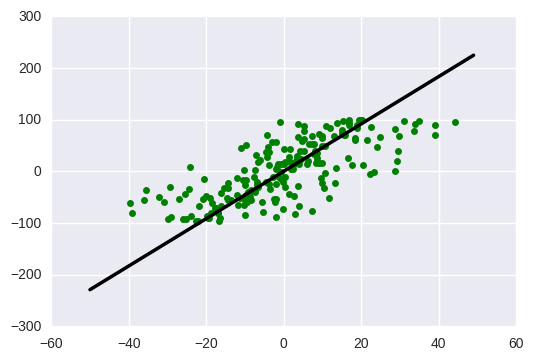

In [7]:
# plotting the eigen vectors
#slope of e1 & e2

#[[-0.97701983 -0.2131484 ]
#[ 0.2131484  -0.97701983]] <-- highest eigen value

m1 = eig_pairs[0][1][1]/eig_pairs[0][1][0]

#generate the two lines
x1 = range(-50, 50)
y1 = np.multiply(m1,x1)

plt.plot(x, y, 'o', color='green', markersize=5)
plt.plot(x1[:], y1[:], linewidth=2.5, color='black')

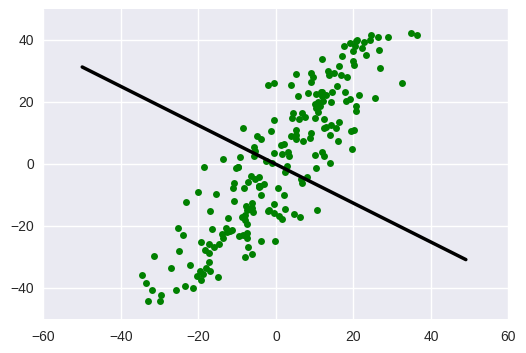

In [18]:
#slope of e1 & e2

#[[-0.97701983 -0.2131484 ]
#[ 0.2131484  -0.97701983]] <-- highest eigen value

m1 = eig_pairs[1][1][1]/eig_pairs[1][1][0]

#generate the two lines
x1 = range(-50, 50)
y1 = np.multiply(m1,x1)

plt.plot(x, y, 'o', color='green', markersize=5)
plt.plot(x1[:], y1[:], linewidth=2.5, color='black')

**Step 6: project onto the 1-D line**

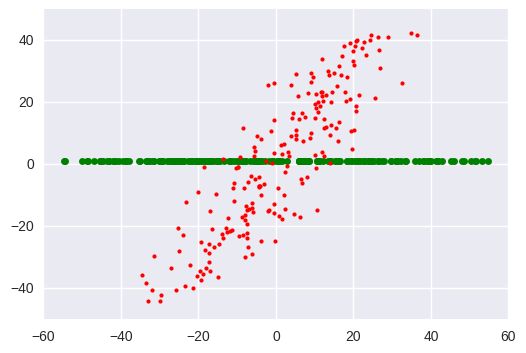

In [20]:
proj = eig_pairs[0][1]
Y_pca = X.dot(proj)
plt.plot(Y_pca, np.ones(Y_pca.shape), 'o', color='green', markersize=5)
plt.plot(x, y, 'o', color='red', markersize=3)

This should provide some intuitive idea behind the PCA approach. From figure it can be seen that PCA tries to project data onto lower dimension while preserving the maximum variance.

## Using sklearn library

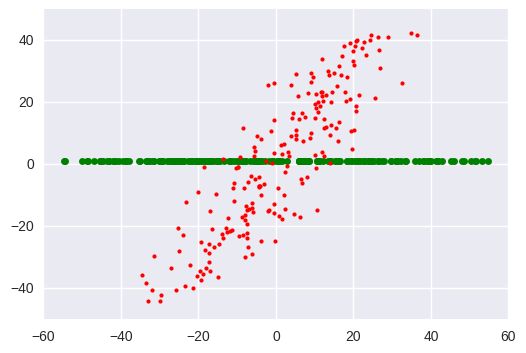

In [22]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

plt.plot(Y_pca, np.ones(Y_pca.shape), 'o', color='green', markersize=5)
plt.plot(x, y, 'o', color='red', markersize=3)

In [25]:
print sklearn_pca.components_

[[-0.5315577  -0.84702209]]


In [11]:
sklearn_pca.explained_variance_

array([ 3379.56885969])

In [12]:
sklearn_pca.mean_

array([-0.30105431,  1.03578914])

## PCA: Face Recognition

See: https://www.youtube.com/watch?v=_lY74pXWlS8

In [26]:
from sklearn.datasets import fetch_lfw_people
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

2017-01-12 18:01:32,647 Loading LFW people faces from /home/skalra/scikit_learn_data/lfw_home


In [27]:
lfw_people.data.shape

(1288, 1850)

1850

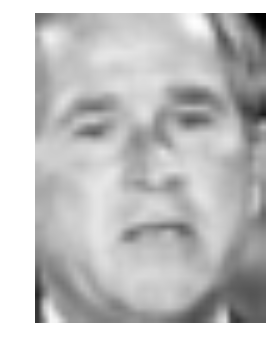

In [34]:
plt.imshow(lfw_people.images[2], cmap='Greys_r')
plt.axis('off')

**PCA to extract 25 components**

In [46]:
n_components = 50
X = lfw_people.data
pca = PCA(n_components=n_components, svd_solver='randomized').fit(X)

**Eigen faces**

Eigen face is pricipal components after applying PCA on data-set. Intuitively, each eigen face represent a feature set such that their linear combinations can be used to construct any other faces. 

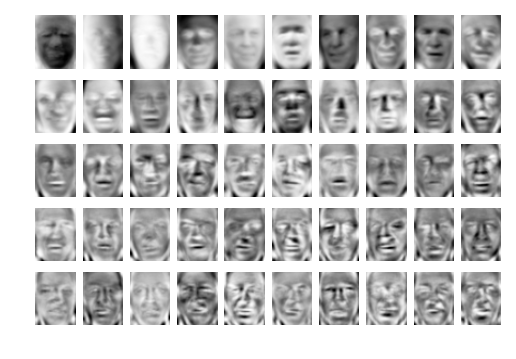

In [47]:
for i, component in enumerate(pca.components_):
    plt.subplot(5, 10, i+1)
    plt.imshow(component.reshape(50, 37), cmap='Greys_r')
    plt.axis('off')

In [95]:
# Each pricipal component is same shape as data-point 
pca.components_.shape

(50, 1850)

**Generate random face from PCs**

We can use principal components to generate a random face.

(-0.5, 36.5, 49.5, -0.5)

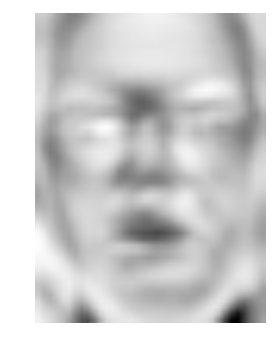

In [48]:
rf = np.zeros((50, 37))
for c in pca.components_:
  rf += (c*np.random.rand()).reshape(50, 37)
plt.imshow(rf, cmap='Greys_r')
plt.axis('off')

**Reconstructing the training face image using PCs**

Let reconstruct a given face from data-set to see how well pricipal components are.

(-0.5, 36.5, 49.5, -0.5)

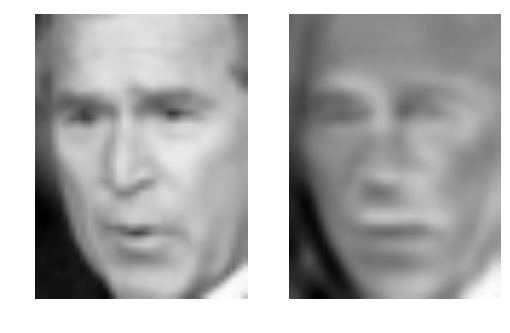

In [96]:
ii = 10

lcp = pca.transform(lfw_people.data[ii].reshape(1, -1))
rf = np.zeros((50, 37))
for lp, c in zip(lcp.T, pca.components_):
  rf += (lp*c).reshape(50, 37)

plt.subplot(1, 2, 1)
plt.imshow(lfw_people.images[ii], cmap='Greys_r')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(rf, cmap='Greys_r')
plt.axis('off')

**Reconstructing external face using PCs**

I'll use my face, which is not part of data-set and reconstruct using eigen faces from training data-set to see how well it can reconstruct an external face.

(-0.5, 36.5, 49.5, -0.5)

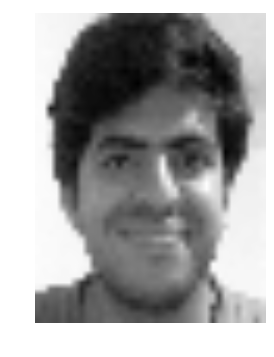

In [89]:
from skimage.io import imread
from skimage.transform import resize

sim_o = imread('./images/me.png')
sim = np.mean(sim_o, axis=2)
sim = resize(sim, (50, 37))

plt.imshow(sim, cmap='Greys_r')
plt.axis('off')

(-0.5, 36.5, 49.5, -0.5)

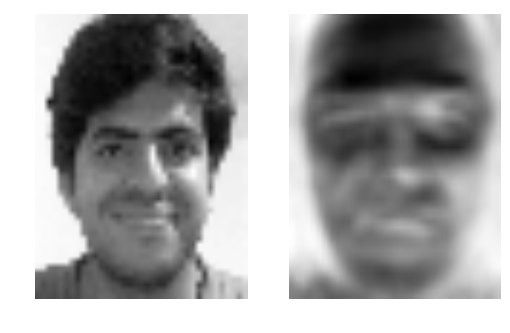

In [92]:
lcp = pca.transform(sim.ravel().reshape(1, -1))
rf = np.zeros((50, 37))

for lp, c in zip(lcp.T, pca.components_):
  rf += (lp*c).reshape(50, 37)

plt.subplot(1, 2, 1)
plt.imshow(sim, cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rf, cmap='Greys_r')
plt.axis('off')

**Querying closest face**

Features extracted from PCA can be used for queying the 

In [93]:
from scipy.spatial import cKDTree

# make a query tree indexing all the PCA reduced faces
pres_query = cKDTree(pca.transform(X))

# query external face (3 closest matches)
_, idxs = pres_query.query(lcp, k=3)
idxs

array([[329, 470,  25]])

(-0.5, 36.5, 49.5, -0.5)

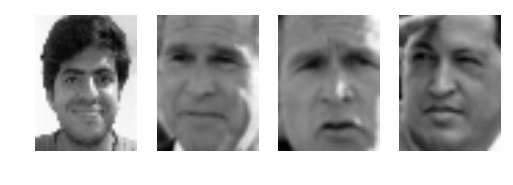

In [94]:
# plots the matches
plt.subplot(1, 4, 1)
plt.imshow(sim, cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(lfw_people.images[329], cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(lfw_people.images[470], cmap='Greys_r')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(lfw_people.images[25], cmap='Greys_r')
plt.axis('off')